# MTA Data Challenges

In [1]:
from __future__ import division
import csv
from datetime import datetime
from collections import Counter

### Challenge 1

In [185]:
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150627.txt
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150620.txt
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150613.txt
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150606.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.0M    0 24.0M    0     0  1493k      0 --:--:--  0:00:16 --:--:-- 1059k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.1M    0 24.1M    0     0  4503k      0 --:--:--  0:00:05 --:--:-- 5285k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.8M    0 23.8M    0     0  2047k      0 --:--:--  0:00:11 --:--:-- 2679k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.9M    0 23.9M    0     0  3140k      0 --:--:--  0:00:07 --:--:-- 4560k


In [224]:
files = ['turnstile_150627.txt', 'turnstile_150620.txt', 
         'turnstile_150613.txt', 'turnstile_150606.txt']

all_rows = []

for file in files:
    with open(file) as f:
        reader = csv.reader(f)
        rows = [[cell.strip() for cell in row] for row in reader]

        rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']
        
        for row in rows:
            all_rows.append(row)


for row in all_rows:
    raw_readings.setdefault(tuple(row[:4]), []).append(tuple(row[4:]))
    

`raw_readings` is a solution to Challenge 1.

### Challenge 2

In [226]:
datetime_cumulative = {turnstile: [(datetime.strptime(date + time,
                                                      '%m/%d/%Y%X'),
                                    int(in_cumulative))
                                   for _, _, date, time,
                                       _, in_cumulative, _ in rows]
                       for turnstile, rows in raw_readings.items()}

In [236]:
for turnstile, rows in datetime_cumulative.items():
    assert rows == sorted(rows)

AssertionError: 

In [237]:
datetime_count_times = {turnstile: [[rows[i][0],
                                     rows[i+1][1] - rows[i][1],
                                     rows[i+1][0] - rows[i][0]]
                                    for i in range(len(rows) - 1)]
                        for turnstile, rows in datetime_cumulative.items()}

In [238]:
datetime_count_times['N009', 'R174', '01-00-02', '181 ST']

[[datetime.datetime(2015, 6, 20, 1, 0), 10, datetime.timedelta(0, 14400)],
 [datetime.datetime(2015, 6, 20, 5, 0), 182, datetime.timedelta(0, 14400)],
 [datetime.datetime(2015, 6, 20, 9, 0), 368, datetime.timedelta(0, 14400)],
 [datetime.datetime(2015, 6, 20, 13, 0), 343, datetime.timedelta(0, 14400)],
 [datetime.datetime(2015, 6, 20, 17, 0), 231, datetime.timedelta(0, 14400)],
 [datetime.datetime(2015, 6, 20, 21, 0), 102, datetime.timedelta(0, 14400)],
 [datetime.datetime(2015, 6, 21, 1, 0), 15, datetime.timedelta(0, 14400)],
 [datetime.datetime(2015, 6, 21, 5, 0), 123, datetime.timedelta(0, 14400)],
 [datetime.datetime(2015, 6, 21, 9, 0), 261, datetime.timedelta(0, 14400)],
 [datetime.datetime(2015, 6, 21, 13, 0), 338, datetime.timedelta(0, 14400)],
 [datetime.datetime(2015, 6, 21, 17, 0), 179, datetime.timedelta(0, 14400)],
 [datetime.datetime(2015, 6, 21, 21, 0), 51, datetime.timedelta(0, 14400)],
 [datetime.datetime(2015, 6, 22, 1, 0), 12, datetime.timedelta(0, 14400)],
 [datetime

In [239]:
all_counts = [count for rows in datetime_count_times.values() for _, count, _ in rows]
all_counts.sort()
print(all_counts[-50:])

[225056, 241641, 359345, 359683, 377252, 378073, 445150, 490424, 490525, 531430, 540997, 548566, 548684, 574928, 887474, 943123, 1266437, 1499315, 1499522, 1519538, 1712377, 1712828, 1954557, 2153863, 2447603, 2633448, 3412201, 3412202, 4223589, 4223668, 7395381, 7395428, 7666362, 8545675, 8548263, 8647553, 13556075, 13556890, 33554471, 50331648, 83614107, 117440499, 134217727, 451130778, 1208443897, 1541995760, 1654386201, 1654386270, 1981612044, 1981612056]


In [240]:
all_times = [duration.total_seconds() / 60 / 60
             for rows in datetime_count_times.values()
             for _, _, duration in rows]
print(Counter(all_times).most_common(10))

[(4.0, 691878), (4.2, 41954), (-332.0, 12660), (8.0, 812), (4.433333333333334, 701), (0.02222222222222222, 193), (0.022500000000000003, 111), (0.02277777777777778, 106), (-331.8, 106), (-332.03333333333336, 83)]


In [241]:
datetime_counts = {turnstile: [(time, count)
                               for (time, count, _) in rows
                               if 0 <= count <= 5000]
                   for turnstile, rows in datetime_count_times.items()}

`datetime_counts` is a solution to Challenge 2.

### Challenge 3

In [243]:
day_counts = {}
for turnstile, rows in datetime_counts.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts[turnstile] = sorted(by_day.items())

In [244]:
day_counts['N009', 'R174', '01-00-02', '181 ST']

[(datetime.date(2015, 5, 30), 2173),
 (datetime.date(2015, 5, 31), 1463),
 (datetime.date(2015, 6, 1), 1562),
 (datetime.date(2015, 6, 2), 1673),
 (datetime.date(2015, 6, 3), 1722),
 (datetime.date(2015, 6, 4), 1618),
 (datetime.date(2015, 6, 5), 1676),
 (datetime.date(2015, 6, 6), 1227),
 (datetime.date(2015, 6, 7), 994),
 (datetime.date(2015, 6, 8), 1562),
 (datetime.date(2015, 6, 9), 1719),
 (datetime.date(2015, 6, 10), 1428),
 (datetime.date(2015, 6, 11), 1723),
 (datetime.date(2015, 6, 12), 1665),
 (datetime.date(2015, 6, 13), 1297),
 (datetime.date(2015, 6, 14), 1032),
 (datetime.date(2015, 6, 15), 1607),
 (datetime.date(2015, 6, 16), 1696),
 (datetime.date(2015, 6, 17), 1770),
 (datetime.date(2015, 6, 18), 1691),
 (datetime.date(2015, 6, 19), 1656),
 (datetime.date(2015, 6, 20), 1236),
 (datetime.date(2015, 6, 21), 967),
 (datetime.date(2015, 6, 22), 1624),
 (datetime.date(2015, 6, 23), 1691),
 (datetime.date(2015, 6, 24), 1755),
 (datetime.date(2015, 6, 25), 1752),
 (datetime.d

`day_counts` is a solution to Challenge 3.

### Challenge 4

In [245]:
import matplotlib.pyplot as plt
% matplotlib inline


In [263]:
dates_counts = day_counts['N009', 'R174', '01-00-02', '181 ST']

dates = [date for date, count in dates_counts]
counts = [count for date, count in dates_counts]

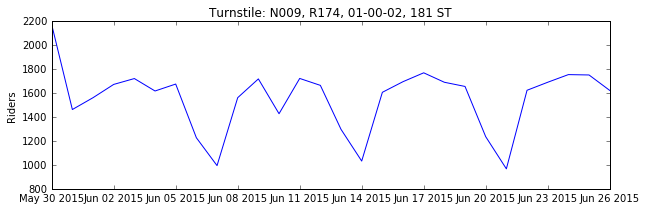

In [264]:
plt.figure(figsize=(10,3))
plt.plot(dates,counts)
plt.ylabel('Riders')
plt.title('Turnstile: N009, R174, 01-00-02, 181 ST')

Plot above is the solution to Challenge 4.

### Challenge 5

'C/A', 'UNIT', 'SCP', 'STATION',

In [248]:
combo_counts = {}
for turnstile, rows in day_counts.items():
    combo = turnstile[0], turnstile[1], turnstile[3]
    by_date = {}
    combo_counts.setdefault(combo, []).append(rows)

In [249]:
from itertools import chain

combo_day_counts = {}
for combo, rows in combo_counts.items():
    rows = list(chain.from_iterable(rows))
    
    by_day = {}
    for date, count in rows:
        by_day[date] = by_day.get(date, 0) + count
    combo_day_counts[combo] = sorted(by_day.items())
    
combo_day_counts['A002', 'R051', 'LEXINGTON AVE']

[(datetime.date(2015, 5, 30), 11239),
 (datetime.date(2015, 5, 31), 8653),
 (datetime.date(2015, 6, 1), 17095),
 (datetime.date(2015, 6, 2), 18366),
 (datetime.date(2015, 6, 3), 18934),
 (datetime.date(2015, 6, 4), 19045),
 (datetime.date(2015, 6, 5), 15728),
 (datetime.date(2015, 6, 6), 12239),
 (datetime.date(2015, 6, 7), 9980),
 (datetime.date(2015, 6, 8), 17753),
 (datetime.date(2015, 6, 9), 18594),
 (datetime.date(2015, 6, 10), 18875),
 (datetime.date(2015, 6, 11), 19035),
 (datetime.date(2015, 6, 12), 15673),
 (datetime.date(2015, 6, 13), 10649),
 (datetime.date(2015, 6, 14), 8675),
 (datetime.date(2015, 6, 15), 17383),
 (datetime.date(2015, 6, 16), 18173),
 (datetime.date(2015, 6, 17), 18378),
 (datetime.date(2015, 6, 18), 18951),
 (datetime.date(2015, 6, 19), 15363),
 (datetime.date(2015, 6, 20), 10606),
 (datetime.date(2015, 6, 21), 7952),
 (datetime.date(2015, 6, 22), 17199),
 (datetime.date(2015, 6, 23), 18000),
 (datetime.date(2015, 6, 24), 18585),
 (datetime.date(2015, 6, 

### Challenge 6

In [250]:
station_counts = {}
for combo, rows in combo_day_counts.items():
    station = combo[2]
    by_date = {}
    station_counts.setdefault(station, []).append(rows)

In [251]:
station_day_counts = {}
for station, rows in station_counts.items():
    rows = list(chain.from_iterable(rows))
    
    by_day = {}
    for date, count in rows:
        by_day[date] = by_day.get(date, 0) + count
    station_day_counts[station] = sorted(by_day.items())
    
station_day_counts['125 ST']

[(datetime.date(2015, 5, 30), 52845),
 (datetime.date(2015, 5, 31), 38849),
 (datetime.date(2015, 6, 1), 76843),
 (datetime.date(2015, 6, 2), 78080),
 (datetime.date(2015, 6, 3), 82799),
 (datetime.date(2015, 6, 4), 79128),
 (datetime.date(2015, 6, 5), 75035),
 (datetime.date(2015, 6, 6), 70394),
 (datetime.date(2015, 6, 7), 60265),
 (datetime.date(2015, 6, 8), 77649),
 (datetime.date(2015, 6, 9), 79321),
 (datetime.date(2015, 6, 10), 82820),
 (datetime.date(2015, 6, 11), 81880),
 (datetime.date(2015, 6, 12), 73662),
 (datetime.date(2015, 6, 13), 61116),
 (datetime.date(2015, 6, 14), 46465),
 (datetime.date(2015, 6, 15), 74532),
 (datetime.date(2015, 6, 16), 77620),
 (datetime.date(2015, 6, 17), 81715),
 (datetime.date(2015, 6, 18), 78069),
 (datetime.date(2015, 6, 19), 72092),
 (datetime.date(2015, 6, 20), 55677),
 (datetime.date(2015, 6, 21), 45258),
 (datetime.date(2015, 6, 22), 76930),
 (datetime.date(2015, 6, 23), 75962),
 (datetime.date(2015, 6, 24), 79953),
 (datetime.date(2015,

### Challenge 7

In [265]:
dates_counts = station_day_counts['181 ST']

dates = [date for date, count in dates_counts]
counts = [count for date, count in dates_counts]

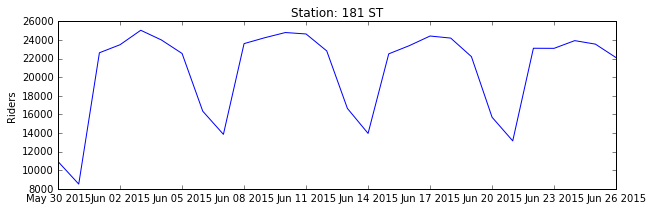

In [296]:
plt.figure(figsize=(10,3))
plt.figure(figsize=(10,3))
plt.plot(dates,counts)
plt.ylabel('Riders')
plt.title('Station: 181 ST')

### Challenge 8

In [275]:
week1 = [count for date, count in dates_counts[:7]]
week2 = [count for date, count in dates_counts[7:14]]
week3 = [count for date, count in dates_counts[14:21]]
week4 = [count for date, count in dates_counts[21:28]]

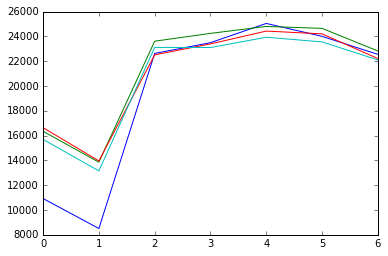

In [276]:
plt.plot(week1)
plt.plot(week2)
plt.plot(week3)
plt.plot(week4)

### Challenge 9

In [290]:
station_total = {}
for station, rows in station_day_counts.items():
    for date, count in rows:
        station_total[station] = station_total.get(station, 0) + count

In [291]:
import operator
station_total_order = sorted(station_total.items(), key=operator.itemgetter(1), 
                       reverse = True)

In [292]:
station_total_order[:10]

[('34 ST-PENN STA', 4365976),
 ('42 ST-GRD CNTRL', 3794145),
 ('34 ST-HERALD SQ', 2981461),
 ('86 ST', 2822514),
 ('14 ST-UNION SQ', 2782367),
 ('42 ST-TIMES SQ', 2558214),
 ('42 ST-PA BUS TE', 2386883),
 ('96 ST', 2033951),
 ('125 ST', 1985197),
 ('FULTON ST', 1890881)]

### Challenge 10

In [293]:
total_ridership_counts = [count for station, count in station_total.items()]

(array([ 299.,   49.,   19.,    5.,    5.,    2.,    3.,    0.,    1.,    1.]),
 array([  3.78100000e+03,   4.40000500e+05,   8.76220000e+05,
          1.31243950e+06,   1.74865900e+06,   2.18487850e+06,
          2.62109800e+06,   3.05731750e+06,   3.49353700e+06,
          3.92975650e+06,   4.36597600e+06]),
 <a list of 10 Patch objects>)

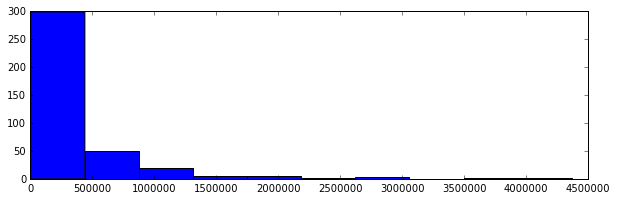

In [295]:
plt.figure(figsize=(10,3))
plt.hist(total_ridership_counts)